In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime
from datetime import timedelta
import random
%matplotlib inline

# Application of bias correction in crime prediction models to Bogotá 

In [2]:
data=pd.read_csv('C:/Users/jsmor/Dropbox (Quantil)/Crimen/AddressBias/mohler_santafe.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data.FECHA_HECHO=pd.to_datetime(data.FECHA_HECHO)
#data=data.loc[data.Localidad!=99,:]
data.columns=['Date', 'hour', 'long', 'lat', 'weekday', 'localidad', 'Neighborhood','knowledge', 'type', 'homicides', 'reports']

In [3]:
data.head()

,Date,hour,long,lat,weekday,localidad,Neighborhood,knowledge,type,homicides,reports
0,2017-02-19,10,-74.066984,4.613701,7,3,LA MACARENA,POR INFORMACION POLICIVA,LESIONES PERSONALES,False,False
1,2017-01-02,22,-74.066839,4.602987,1,3,LA MACARENA,POR DENUNCIA,HURTO A PERSONAS,False,True
2,2017-01-17,19,-74.068788,4.615366,2,3,SAGRADO CORAZON,POR FISCALIA / CRUCE SPOA-SIEDCO,HURTO A PERSONAS,False,True
3,2017-01-09,12,-74.069587,4.611348,1,3,SAGRADO CORAZON,POR FISCALIA / CRUCE SPOA-SIEDCO,HURTO A PERSONAS,False,True
4,2017-01-14,4,-74.074150,4.608824,6,3,LAS NIEVES,POR INFORMACION POLICIVA,HURTO A PERSONAS,False,False


In [4]:
data=data.groupby(['Date', 'Neighborhood'])['reports'].agg(['count', 'sum'])
data.reset_index(inplace=True)
data.columns=['Date', 'Neighborhood', 'tot_crimes', 'reports']
data['discovered']=data['tot_crimes']-data['reports']

In [5]:
data.head()

,Date,Neighborhood,tot_crimes,reports,discovered
0,2017-01-01,LAS NIEVES,1,1.0,0.0
1,2017-01-01,SAGRADO CORAZON,1,1.0,0.0
2,2017-01-02,LA MACARENA,3,3.0,0.0
3,2017-01-02,LAS NIEVES,6,6.0,0.0
4,2017-01-03,LA MACARENA,1,1.0,0.0


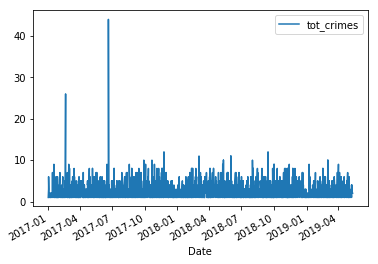

In [6]:
data.plot(y='tot_crimes', x='Date')

#### Creation of initial state (urn)

In [7]:
## Get the crimes per neigborhood for a range of dates
initial_date='2017-01-01'
end_date='2017-06-01'
initial_urn=pd.DataFrame(data.loc[(data.Date>=initial_date) & (data.Date<=end_date), :].groupby('Neighborhood')['tot_crimes'].sum())
initial_urn/initial_urn.tot_crimes.sum()

,tot_crimes
Neighborhood,
LA MACARENA,0.137430
LAS NIEVES,0.558659
SAGRADO CORAZON,0.303911


In [8]:
lambdas_tilde=pd.DataFrame(data.groupby('Neighborhood')['homicides'].sum())
lambdas_tilde=lambdas_tilde.iloc[:-1,:]
lambdas_tilde=lambdas_tilde/lambdas_tilde.homicides.sum()
lambdas_tilde

KeyError: 'Column not found: homicides'

# Real urn behavior for Bogotá

In [8]:
real_urn=initial_urn
real_urn_prop=initial_urn.tot_crimes/initial_urn.tot_crimes.sum()


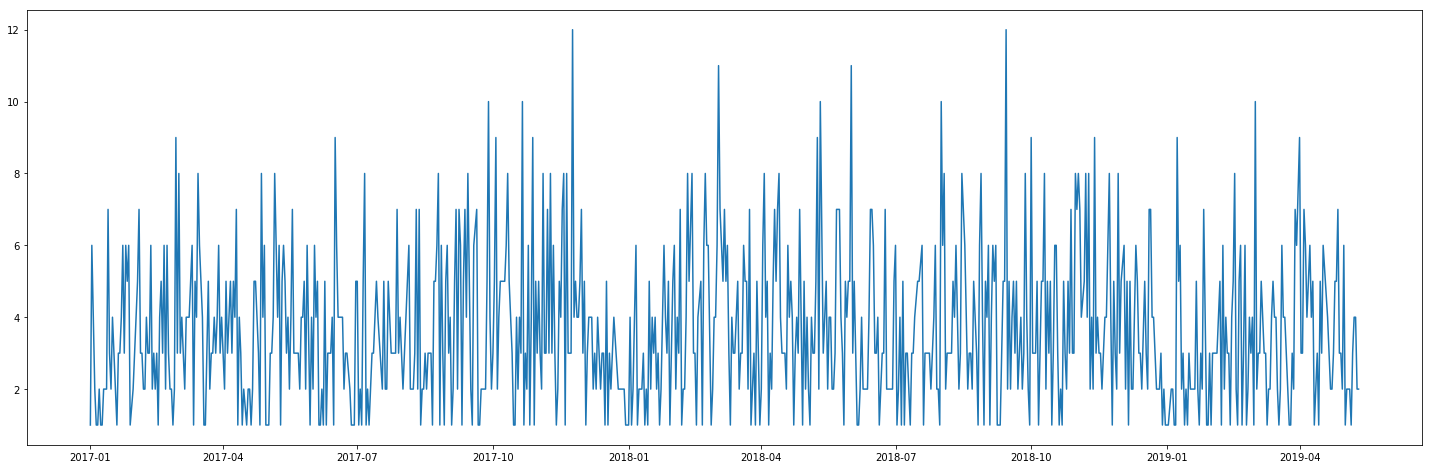

In [9]:
plt.figure(figsize=(25,8))
plt.plot(data.loc[data.Neighborhood=='LAS NIEVES',:].Date,data.loc[data.Neighborhood=='LAS NIEVES',:].tot_crimes)

In [10]:
data_reshape=data.pivot(index='Neighborhood', columns='Date', values='tot_crimes')
data_reshape.fillna(0, inplace=True)
data_reshape.head()
#data_reshape=data_reshape.rolling(180,axis=1).sum()

Date,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2019-05-02 00:00:00,2019-05-03 00:00:00,2019-05-04 00:00:00,2019-05-05 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,2019-05-08 00:00:00,2019-05-09 00:00:00,2019-05-10 00:00:00,2019-05-11 00:00:00
Neighborhood,,,,,,,,,,,,,,,,,,,,,
LA MACARENA,0.0,3.0,1.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
LAS NIEVES,1.0,6.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,...,1.0,2.0,2.0,2.0,1.0,3.0,4.0,4.0,2.0,2.0
SAGRADO CORAZON,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,0.0,...,3.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0


In [11]:
urns=(data_reshape.rolling(180,axis=1).sum()/data_reshape.rolling(180,axis=1).sum().sum())

In [12]:
urns.iloc[:,179:]

Date,2017-06-29 00:00:00,2017-06-30 00:00:00,2017-07-01 00:00:00,2017-07-02 00:00:00,2017-07-03 00:00:00,2017-07-04 00:00:00,2017-07-05 00:00:00,2017-07-06 00:00:00,2017-07-07 00:00:00,2017-07-08 00:00:00,...,2019-05-02 00:00:00,2019-05-03 00:00:00,2019-05-04 00:00:00,2019-05-05 00:00:00,2019-05-06 00:00:00,2019-05-07 00:00:00,2019-05-08 00:00:00,2019-05-09 00:00:00,2019-05-10 00:00:00,2019-05-11 00:00:00
Neighborhood,,,,,,,,,,,,,,,,,,,,,
LA MACARENA,0.131627,0.130672,0.129882,0.128507,0.129178,0.129730,0.130045,0.130009,0.128342,0.128000,...,0.116453,0.116578,0.116827,0.117584,0.117391,0.118162,0.117712,0.11674,0.116279,0.117188
LAS NIEVES,0.531079,0.530853,0.530427,0.529412,0.528455,0.527027,0.528251,0.529831,0.530303,0.529778,...,0.662393,0.662032,0.662379,0.660194,0.658696,0.657549,0.657866,0.65859,0.658915,0.657366
SAGRADO CORAZON,0.337294,0.338475,0.339691,0.342081,0.342367,0.343243,0.341704,0.340160,0.341355,0.342222,...,0.221154,0.221390,0.220793,0.222222,0.223913,0.224289,0.224422,0.22467,0.224806,0.225446


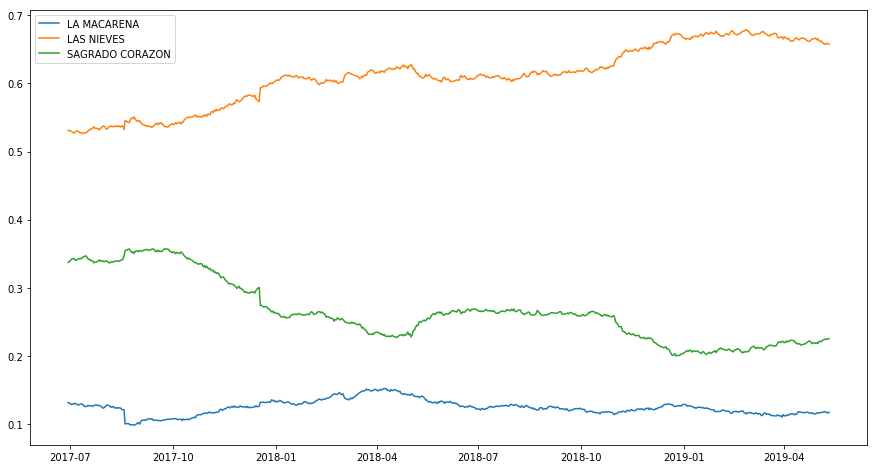

In [13]:
plt.figure(figsize=(15,8))
for i in range(3):
    plt.plot(urns.iloc[i,179:].index, urns.iloc[i,179:]) 
plt.legend()

In [14]:
data_reshape=data.pivot(index='Neighborhood', columns='Date', values='discovered')
data_reshape.fillna(0, inplace=True)
#data_reshape=data_reshape.rolling(180,axis=1).sum()

In [15]:
urns_discovered=(data_reshape.rolling(180,axis=1).sum()/data_reshape.rolling(180,axis=1).sum().sum())

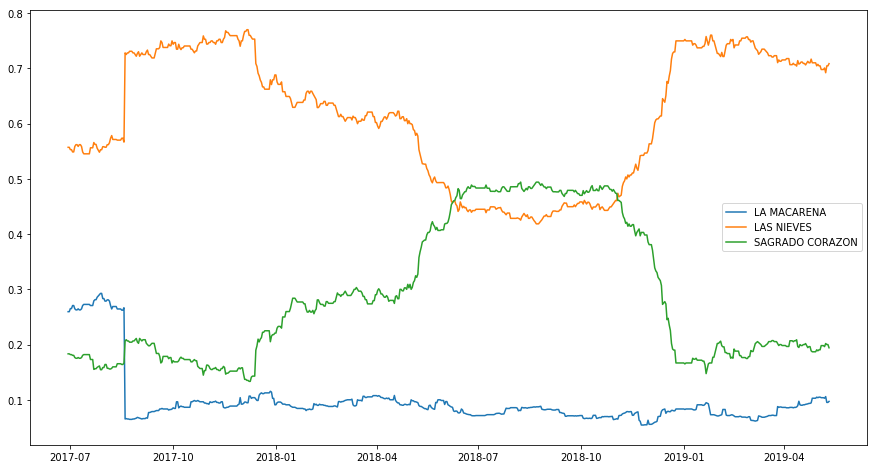

In [17]:
plt.figure(figsize=(15,8))
for i in range(3):
    plt.plot(urns_discovered.iloc[i,179:].index, urns_discovered.iloc[i,179:]) 
plt.legend()
#plt.title('Urn real proportion of discovered crimes', fontsize=22);

In [18]:
data_reshape=data.pivot(index='Neighborhood', columns='Date', values='reports')
data_reshape.fillna(0, inplace=True)
#data_reshape=data_reshape.rolling(180,axis=1).sum()

In [19]:
urns_reported=(data_reshape.rolling(180,axis=1).sum()/data_reshape.rolling(180,axis=1).sum().sum())

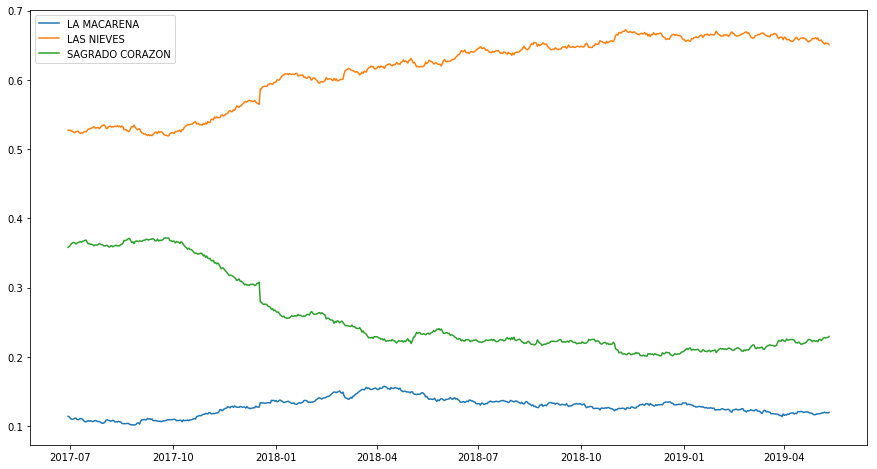

In [20]:
plt.figure(figsize=(15,8))
for i in range(3):
    plt.plot(urns_reported.iloc[i,179:].index, urns_reported.iloc[i,179:]) 
plt.legend()
#plt.title('Urn real proportion of reported crimes', fontsize=22);

In [22]:
urns_reported.iloc[:,0]/urns_reported.iloc[:,0].sum()

Neighborhood
LA MACARENA       NaN
LAS NIEVES        NaN
SAGRADO CORAZON   NaN
Name: 2017-01-01 00:00:00, dtype: float64

#### Reported-Discovered

In [23]:
difference=urns_discovered-urns_reported

(0.5, -0.5)

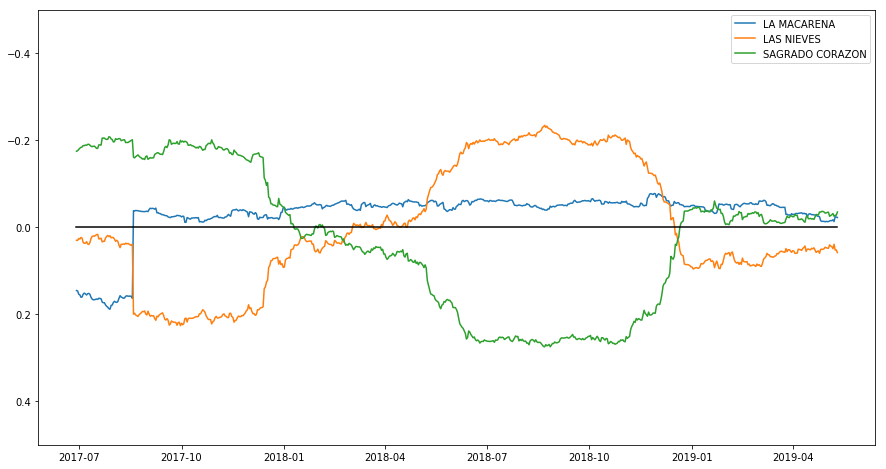

In [24]:
plt.figure(figsize=(15,8))
for i in range(3):
    plt.plot(difference.iloc[i,179:].index, difference.iloc[i,179:])
plt.plot(difference.iloc[1,179:].index,[0]*len(difference.iloc[1,179:]), color='black')
plt.legend()
plt.ylim([0.5,-0.5])

# Simulation with reports and discoveries

#### Functions

In [25]:
def add(urn, value, j, col):
    result=urn.iloc[j,col]+value*3
    return(result)
def trial_bernoulli(urn, reported, col):
    proportions=np.array((urn.iloc[:, col]+reported.iloc[:,col])/(urn.iloc[:, col].sum()+reported.iloc[:, col].sum()))
    rand=[]
    for i in range(len(proportions)):
        rand.append(random.uniform(0,1))
    boolean=[]
    for i in range(len(proportions)):
        boolean.append(rand[i]<proportions[i])
    return(boolean)
def one_t(urn, reported,col):
    for i in range(urn.shape[0]):
        boolean=trial_bernoulli(urn, reported, col)
        if sum(boolean)==urn.shape[0]:
            urn.iloc[i,(col+1)]=add(urn, urn.iloc[i,(col+1)], i, col)
        else:
            urn.iloc[i,(col+1)]=urn.iloc[i,(col)]
    return(urn)

In [26]:
discovered=data.pivot(index='Neighborhood', columns='Date', values='discovered')
discovered.fillna(0, inplace=True)
first=(discovered.rolling(180,axis=1).sum()).iloc[:,179]
discovered.iloc[:,179]=first
discovered=discovered.iloc[:,179:]


In [27]:
data_reshape=data.pivot(index='Neighborhood', columns='Date', values='reports')
data_reshape.fillna(0, inplace=True)
urns_reported=(data_reshape.rolling(180,axis=1).sum())
urns_reported=urns_reported.iloc[:,179:]

In [28]:
for i in range(discovered.shape[1]-1):
    discovered=one_t(discovered,urns_reported, i)

In [29]:
tot=discovered+urns_reported

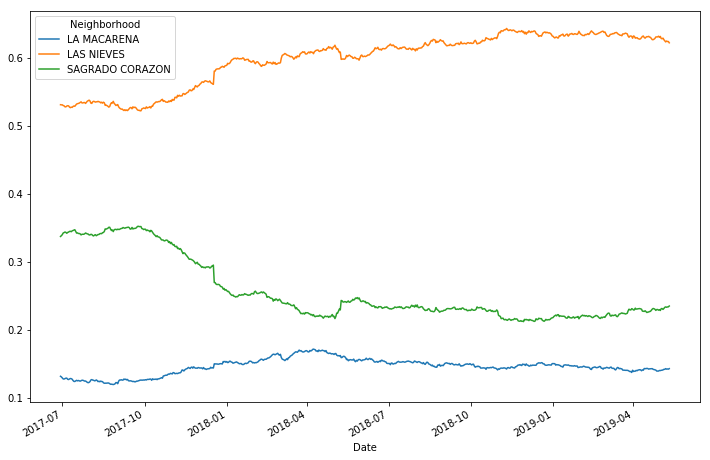

In [30]:
(tot/tot.sum()).T.plot(figsize=(12,8))

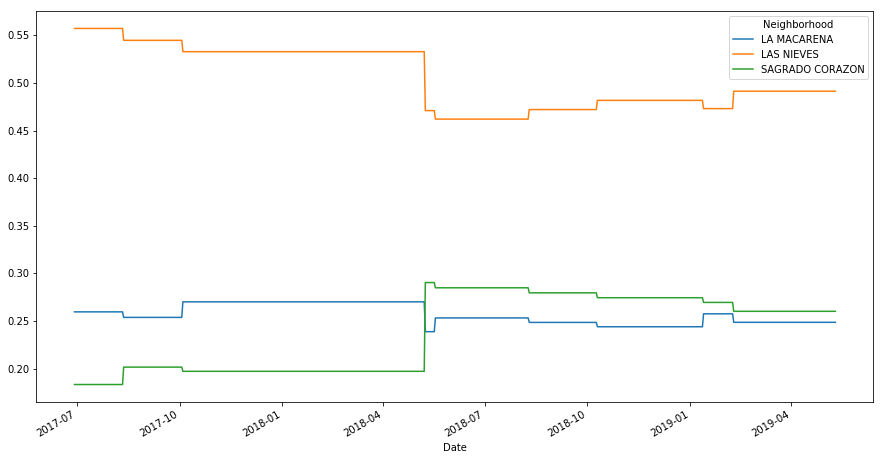

In [31]:
(discovered/discovered.sum()).T.plot(figsize=(15,8))

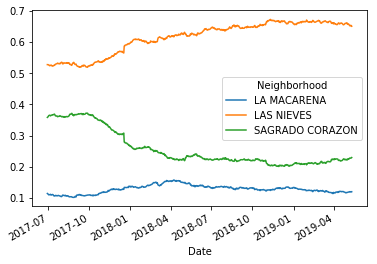

In [32]:
(urns_reported/urns_reported.sum()).T.plot()

In [33]:
discovered.iloc[:,[0,-1]]/discovered.iloc[:,[0,-1]].sum()

Date,2017-06-29 00:00:00,2019-05-11 00:00:00
Neighborhood,,
LA MACARENA,0.259542,0.248555
LAS NIEVES,0.557252,0.491329
SAGRADO CORAZON,0.183206,0.260116


In [34]:
tot.iloc[:,[0,-1]]

Date,2017-06-29 00:00:00,2019-05-11 00:00:00
Neighborhood,,
LA MACARENA,144.0,138.0
LAS NIEVES,581.0,601.0
SAGRADO CORAZON,369.0,227.0


In [35]:
urns_reported.iloc[:,[0,-1]]/urns_reported.iloc[:,[0,-1]].sum()

Date,2017-06-29 00:00:00,2019-05-11 00:00:00
Neighborhood,,
LA MACARENA,0.114226,0.119798
LAS NIEVES,0.527518,0.650694
SAGRADO CORAZON,0.358255,0.229508


# Simulations with only discoveries

#### Functions

In [36]:
#def add(urn, value, j, col):
#    result=urn.iloc[j,col]+value
#    return(result)
def trial_bernoulli(urn, col):
    proportions=np.array((urn.iloc[:, col])/(urn.iloc[:, col].sum()))
    rand=[]
    for i in range(len(proportions)):
        rand.append(random.uniform(0,1))
    #boolean=[]
    #for i in range(len(proportions)):
    #    boolean.append(rand[i]<proportions[i])
    urn.iloc[:,(col+1)]=(urn.iloc[:,(col)]+ np.product(proportions)*urn.iloc[:,(col+1)])
    return(urn)
#def one_t(urn,col):
#    for i in range(urn.shape[0]):
#        urn=trial_bernoulli(urn, col)
#    return(urn)

In [37]:
discovered=data.pivot(index='Neighborhood', columns='Date', values='discovered')
discovered.fillna(0, inplace=True)
first=(discovered.rolling(180,axis=1).sum()).iloc[:,179]
discovered.iloc[:,179]=first/first.sum()
discovered=discovered.iloc[:,179:]


In [38]:
for i in range(discovered.shape[1]-1):
    discovered=trial_bernoulli(discovered, i)

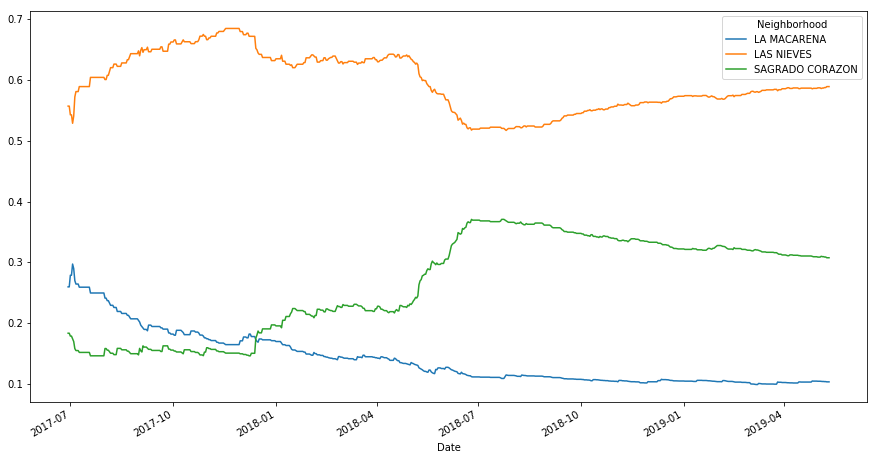

In [39]:
(discovered/discovered.sum()).T.plot(figsize=(15,8))

In [40]:
X=discovered.iloc[:,0:]/discovered.iloc[:,0:].sum()

In [41]:
dif2=X-(urns_reported/urns_reported.sum())

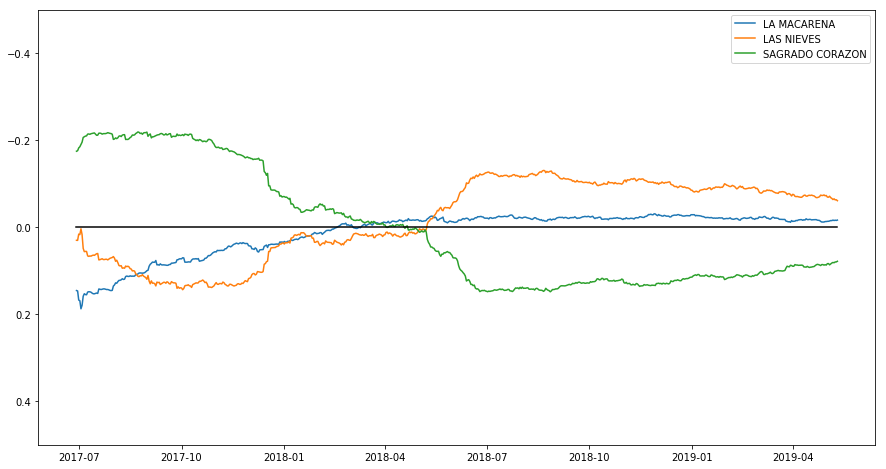

In [42]:
plt.figure(figsize=(15,8))
for i in range(3):
    plt.plot(dif2.iloc[i,:].index, dif2.iloc[i,:])
plt.plot(dif2.iloc[1,:].index,[0]*len(dif2.iloc[1,:]), color='black')
plt.ylim([0.5,-0.5])
plt.legend()